In [1]:
import sympy as sp
import scipy as scp
m, g, R, M, I, k, t, VV, E0, r = sp.symbols('m, g, R, M, I, gamma t, omega, E0, r ')

y0, u, w = sp.symbols('y0, u, w ') # y0=y center mass0, u-v center wheel0, w-m vel0

E0 = m*g*y0 + M*u**2/2 + I*u**2/(2*R**2) + m*w**2/2

fi0 = sp.symbols('varphi0')
fi = sp.symbols(r'\varphi')

exprg = m*r/((M+m)*R)
E1= m*g*(R+r) #Wpm
E2 = (M*R**2+I)*VV**2/2 #EM 
E3= m*(VV*(R+r))**2/2 # Em
eqmin = sp.Eq(E1+E2+E3,E0).subs(k, exprg)
fidot = list(sp.solveset(eqmin, VV))[0]
an = ((VV**2*k*R).subs(k, exprg)).subs(VV, fidot)

In [2]:
num1 = 100
num2 = 100
u1 = 2
u2 = 5
r1 = 1
r2 = 7
s=0
t=0
Rin = 0.075
t0 = num1*(u2-u1)*num2*(r2-r1)
arrv = [ 0 for i in range(len(range(int(u1*num1),int(u2*num1),1))*len(range (int(r1*num2),int(r2*num2),1)))]
arrr = [ 0 for i in range(len(range(int(u1*num1),int(u2*num1),1))*len(range (int(r1*num2),int(r2*num2),1)))]
for ui in range (int(u1*num1),int(u2*num1),1):
    for ri in range (int(r1*num2),int(r2*num2),1): 
        p = (Rin - (ri/num2)/100)/Rin 
        arr = [(M,0.070), (R, Rin), (r, (ri/num2)/100), (m, 0.022), (I,2.15*10**-4), (g,9.8), #system patameters
       (y0, Rin-(ri/num2)/100), (u,ui/num1), (w,(ui/num1)*p), (fi0, 3.1415)] #initial parameters
        #substitution
        t+=1
        if t%1000==0:
            print(t,'/',t0) 
        if 9.795<an.subs(arr)<9.805:
            arrv[s]=ui/num1
            arrr[s]=(ri/num2)/100
            s+=1



1000 / 180000
2000 / 180000
3000 / 180000
4000 / 180000
5000 / 180000
6000 / 180000
7000 / 180000
8000 / 180000
9000 / 180000
10000 / 180000
11000 / 180000
12000 / 180000
13000 / 180000
14000 / 180000
15000 / 180000
16000 / 180000
17000 / 180000
18000 / 180000
19000 / 180000
20000 / 180000
21000 / 180000
22000 / 180000
23000 / 180000
24000 / 180000
25000 / 180000
26000 / 180000
27000 / 180000
28000 / 180000
29000 / 180000
30000 / 180000
31000 / 180000
32000 / 180000
33000 / 180000
34000 / 180000
35000 / 180000
36000 / 180000
37000 / 180000
38000 / 180000
39000 / 180000
40000 / 180000
41000 / 180000
42000 / 180000
43000 / 180000
44000 / 180000
45000 / 180000
46000 / 180000
47000 / 180000
48000 / 180000
49000 / 180000
50000 / 180000
51000 / 180000
52000 / 180000
53000 / 180000
54000 / 180000
55000 / 180000
56000 / 180000
57000 / 180000
58000 / 180000
59000 / 180000
60000 / 180000
61000 / 180000
62000 / 180000
63000 / 180000
64000 / 180000
65000 / 180000
66000 / 180000
67000 / 180000
6800

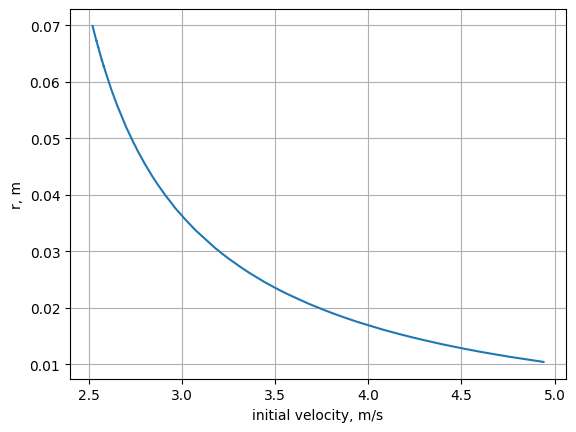

In [3]:
import matplotlib.pyplot as plt
plt.grid()
# plt.ylim(10, 30)
# plt.xlim(2.5,3)
#plt.title('phase diagram')
plt.ylabel('r, m')
plt.xlabel('initial velocity, m/s')
plt.plot([i for i in arrv if i !=0], [i for i in arrr if i !=0])